### 1. Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
print("Ready for work!!")

Ready for work!!


### 2. Load Dataset

In [4]:
def load_data(path):
    data = np.loadtxt(path, delimiter=',')
    X = data[:, :2]
    y = data[:, 2]
    return X, y

X_train, y_train = load_data("data/ex2data2.txt")


### 3. Visualize Data

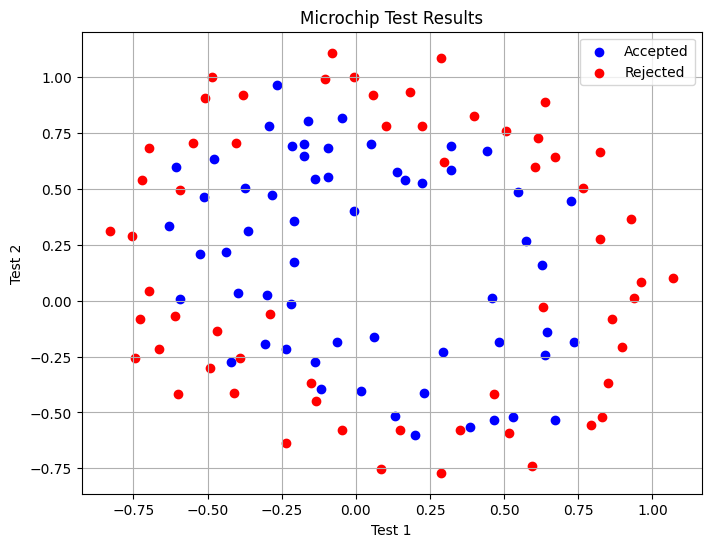

In [5]:
def plot_data(X, y):
    plt.figure(figsize=(8,6))
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', label='Accepted')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='r', label='Rejected')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.legend()
    plt.title('Microchip Test Results')
    plt.grid(True)
    plt.show()

plot_data(X_train, y_train)


### 4. Feature Mapping

In [6]:
poly = PolynomialFeatures(degree=6, include_bias=True)
X_mapped = poly.fit_transform(X_train)
print("Original shape:", X_train.shape)
print("Mapped shape  :", X_mapped.shape)


Original shape: (118, 2)
Mapped shape  : (118, 28)


### 5. Train Regularized Logistic Regression

In [8]:
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
model.fit(X_mapped, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 6. Evaluate Model

In [9]:
y_pred = model.predict(X_mapped)
accuracy = accuracy_score(y_train, y_pred)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


Training Accuracy: 83.05%


### 7. Plot Decision Boundary

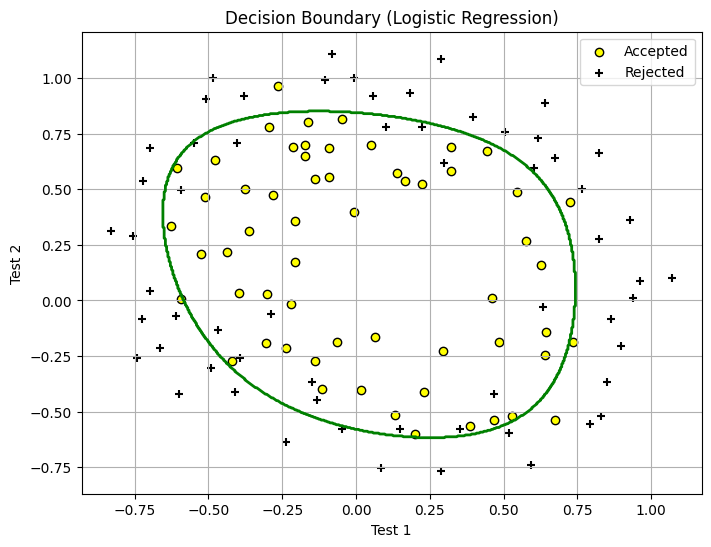

In [10]:
def plot_decision_boundary(model, poly, X, y):
    # Create a grid of points
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    grid = np.c_[xx.ravel(), yy.ravel()]
    grid_mapped = poly.transform(grid)
    Z = model.predict(grid_mapped).reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8,6))
    plt.contour(xx, yy, Z, levels=[0.5], colors='green', linewidths=2)

    # Plot data points with custom markers
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='yellow', edgecolors='k', marker='o', label='Accepted')
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], c='black', marker='+', label='Rejected')

    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.title('Decision Boundary (Logistic Regression)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function
plot_decision_boundary(model, poly, X_train, y_train)


### Optional: Tune Regularization

In [11]:
# Try different values of C (inverse of regularization strength)
for C in [0.01, 0.1, 1, 10, 100]:
    model = LogisticRegression(penalty='l2', C=C, solver='lbfgs', max_iter=1000)
    model.fit(X_mapped, y_train)
    acc = accuracy_score(y_train, model.predict(X_mapped))
    print(f"C={C:<6} → Accuracy: {acc*100:.2f}%")


C=0.01   → Accuracy: 61.02%
C=0.1    → Accuracy: 74.58%
C=1      → Accuracy: 83.05%
C=10     → Accuracy: 83.90%
C=100    → Accuracy: 83.90%
